In [60]:
require(readr)
require(dplyr)
require(ggplot2)

In [131]:
svm.misclassied <- as.data.frame(read_tsv("../data/svm_genes_TPM.tsv.gz"))

Parsed with column specification:
cols(
  .default = col_double(),
  Sample = col_character(),
  her2_status_by_ihc = col_character(),
  SVM_classified = col_character()
)
See spec(...) for full column specifications.


In [132]:
her2.clinical <- as.data.frame(read_tsv("../data/her2_Clinical_Data.tsv"))

Warning message:
“Missing column names filled in: 'X1' [1], 'X2' [2], 'X3' [3]”Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.


In [133]:
her2.clinical$X2 <- NULL
her2.clinical$X3 <- NULL
row.names(her2.clinical) <- her2.clinical$X1
her2.clinical$X1 <- NULL
#her2.clinical <- as.data.frame(t(her2.clinical))

In [134]:
her2.clinical <- as.data.frame(t(her2.clinical))
#her2.clinical

In [135]:
positive.percents <- her2.clinical[which(!is.na(her2.clinical$her2_ihc_percent_positive) & her2.clinical$her2_ihc_percent_positive != "[Not Available]" & her2.clinical$her2_status_by_ihc == "Positive"), c('her2_status_by_ihc', 'her2_ihc_percent_positive')]

In [136]:
negative.percents <- her2.clinical[which(!is.na(her2.clinical$her2_ihc_percent_positive) & her2.clinical$her2_ihc_percent_positive != "[Not Available]" & her2.clinical$her2_status_by_ihc == "Negative"), c('her2_status_by_ihc', 'her2_ihc_percent_positive')]

In [137]:
svm.misclassied[which(svm.misclassied$Sample %in% row.names(positive.percents)), c('Sample','SVM_classified')]

,Sample,SVM_classified
46,TCGA-AC-A2FB-01A-11R-A17B-07,Misclassified
49,TCGA-AC-A8OS-01A-12R-A41B-07,Misclassified
53,TCGA-AN-A0AJ-01A-11R-A00Z-07,Misclassified
54,TCGA-AN-A0AK-01A-21R-A00Z-07,Misclassified
55,TCGA-AN-A0FD-01A-11R-A034-07,Misclassified
56,TCGA-AN-A0FJ-01A-11R-A00Z-07,Misclassified
57,TCGA-AN-A0FK-01A-11R-A034-07,Misclassified
58,TCGA-AN-A0FL-01A-11R-A034-07,Misclassified
59,TCGA-AN-A0FN-01A-11R-A034-07,Misclassified
60,TCGA-AN-A0FS-01A-11R-A034-07,Misclassified


In [138]:
row.names(svm.misclassied) <- svm.misclassied$Sample
positive.percents$Sample <- row.names(positive.percents)

In [139]:
negative.percents$Sample <- row.names(negative.percents)

In [140]:
arrange(merge(positive.percents, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_ihc_percent_positive, SVM_classified)

Sample,her2_status_by_ihc,her2_ihc_percent_positive,ERBB2,SVM_classified
TCGA-E9-A22D-01A-11R-A157-07,Positive,<10%,0.38920154,Misclassified
TCGA-E9-A22E-01A-11R-A157-07,Positive,<10%,-0.43314338,Misclassified
TCGA-E9-A22G-01A-11R-A157-07,Positive,<10%,-0.40763467,Misclassified
TCGA-E9-A22H-01A-11R-A157-07,Positive,<10%,-0.31864586,Misclassified
TCGA-E9-A3X8-01A-31R-A22U-07,Positive,<10%,-0.40105335,Misclassified
TCGA-AC-A2FB-01A-11R-A17B-07,Positive,10-19%,1.40577569,Misclassified
TCGA-AC-A8OS-01A-12R-A41B-07,Positive,10-19%,-0.35589511,Misclassified
TCGA-AO-A03L-01A-41R-A056-07,Positive,10-19%,-0.18608495,Misclassified
TCGA-BH-A18P-01A-11R-A12D-07,Positive,10-19%,-0.12307923,Misclassified
TCGA-AN-A0FK-01A-11R-A034-07,Positive,20-29%,-0.35420157,Misclassified


In [141]:
rf.misclassied <- as.data.frame(read_tsv("../data/rf_genes_TPM.tsv.gz"))

rownames(rf.misclassied) <- rf.misclassied$Sample

Parsed with column specification:
cols(
  .default = col_double(),
  Sample = col_character(),
  her2_status_by_ihc = col_character(),
  RF_classified = col_character()
)
See spec(...) for full column specifications.


In [142]:
arrange(merge(positive.percents, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_ihc_percent_positive, RF_classified)

Sample,her2_status_by_ihc,her2_ihc_percent_positive,ERBB2,RF_classified
TCGA-E9-A22D-01A-11R-A157-07,Positive,<10%,0.38920154,Correct
TCGA-E9-A22E-01A-11R-A157-07,Positive,<10%,-0.43314338,Correct
TCGA-E9-A22G-01A-11R-A157-07,Positive,<10%,-0.40763467,Misclassified
TCGA-E9-A22H-01A-11R-A157-07,Positive,<10%,-0.31864586,Misclassified
TCGA-E9-A3X8-01A-31R-A22U-07,Positive,<10%,-0.40105335,Misclassified
TCGA-AC-A2FB-01A-11R-A17B-07,Positive,10-19%,1.40577569,Correct
TCGA-AC-A8OS-01A-12R-A41B-07,Positive,10-19%,-0.35589511,Misclassified
TCGA-AO-A03L-01A-41R-A056-07,Positive,10-19%,-0.18608495,Misclassified
TCGA-BH-A18P-01A-11R-A12D-07,Positive,10-19%,-0.12307923,Misclassified
TCGA-AN-A0FK-01A-11R-A034-07,Positive,20-29%,-0.35420157,Misclassified


Saving 6.67 x 6.67 in image


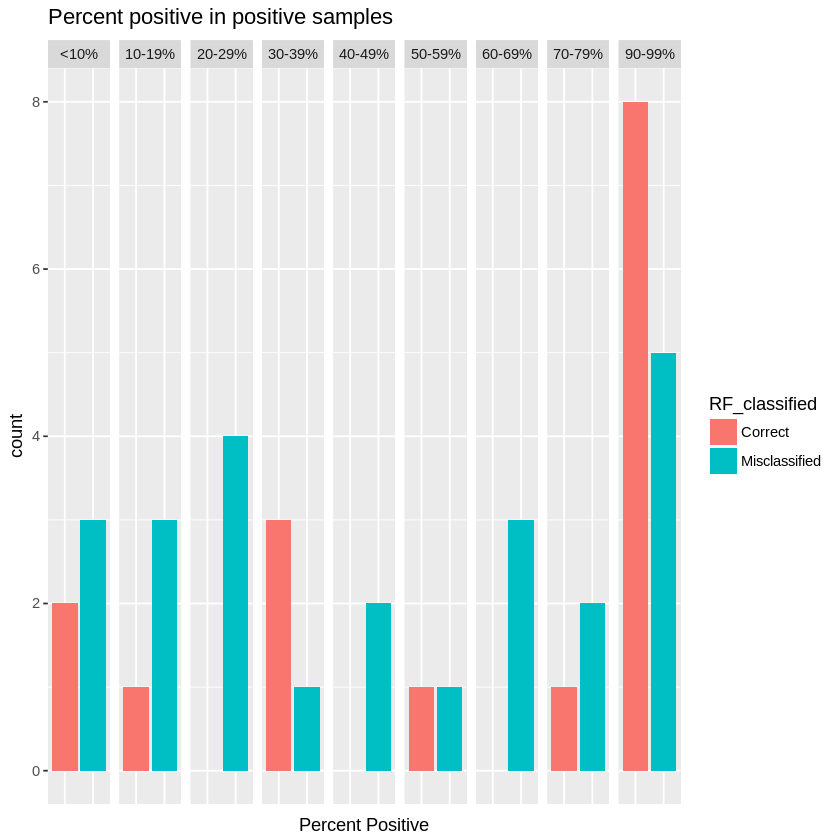

In [143]:
ghist <- ggplot(arrange(merge(positive.percents, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_ihc_percent_positive, RF_classified),
               aes(x = RF_classified, fill = RF_classified))

gghist <- ghist + geom_bar(stat = "count") + facet_grid( ~ her2_ihc_percent_positive) + 
                labs(title = "Percent positive in positive samples", x = "Percent Positive") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/perc_pos_RF.pdf", gghist, device = "pdf")

gghist

Saving 6.67 x 6.67 in image


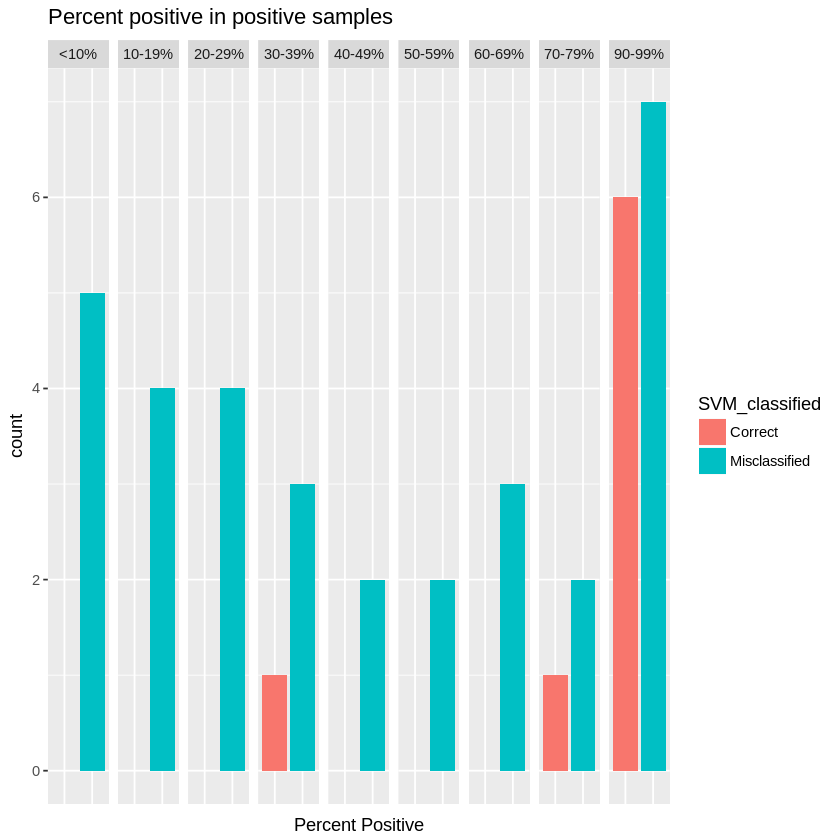

In [144]:
ghist <- ggplot(arrange(merge(positive.percents, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_ihc_percent_positive, SVM_classified),
               aes(x = SVM_classified, fill = SVM_classified))

gghist <- ghist + geom_bar(stat = "count") + facet_grid( ~ her2_ihc_percent_positive) + 
                labs(title = "Percent positive in positive samples", x = "Percent Positive") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/perc_pos_SVM.pdf", gghist, device = "pdf")

gghist

Saving 6.67 x 6.67 in image


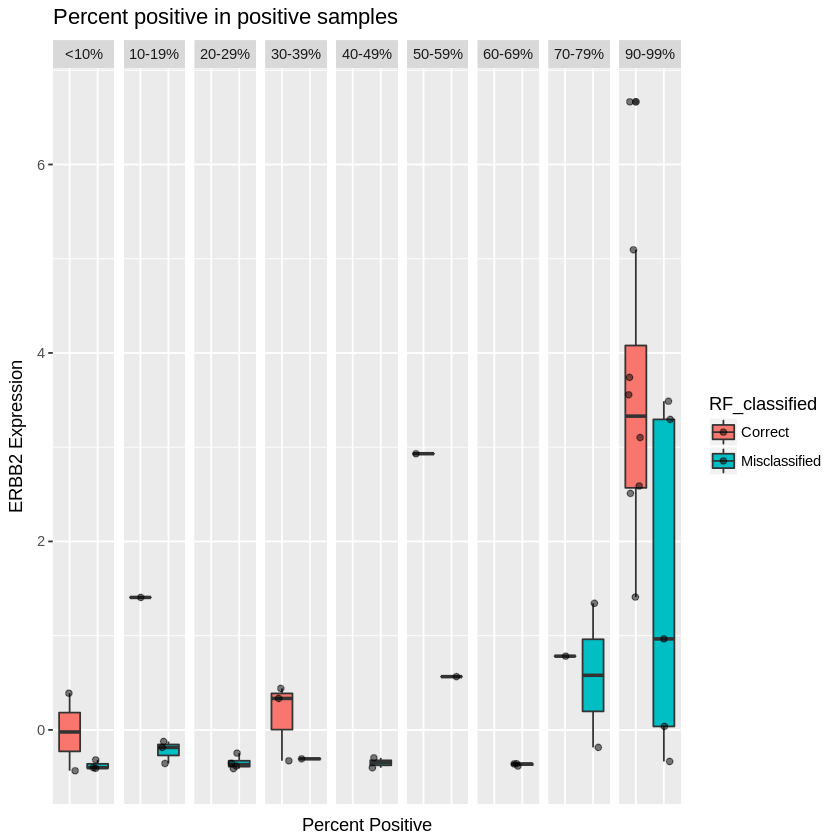

In [145]:
gbox <- ggplot(arrange(merge(positive.percents, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_ihc_percent_positive, RF_classified),
               aes(x = RF_classified, y = ERBB2, fill = RF_classified))

ggbox <- gbox + geom_boxplot() + facet_grid( ~ her2_ihc_percent_positive) + geom_jitter(width = .3, alpha = .5) + 
                labs(title = "Percent positive in positive samples", x = "Percent Positive", y = "ERBB2 Expression") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/perc_pos_RF_ERBB2.pdf", ggbox, device = "pdf")

ggbox

Saving 6.67 x 6.67 in image


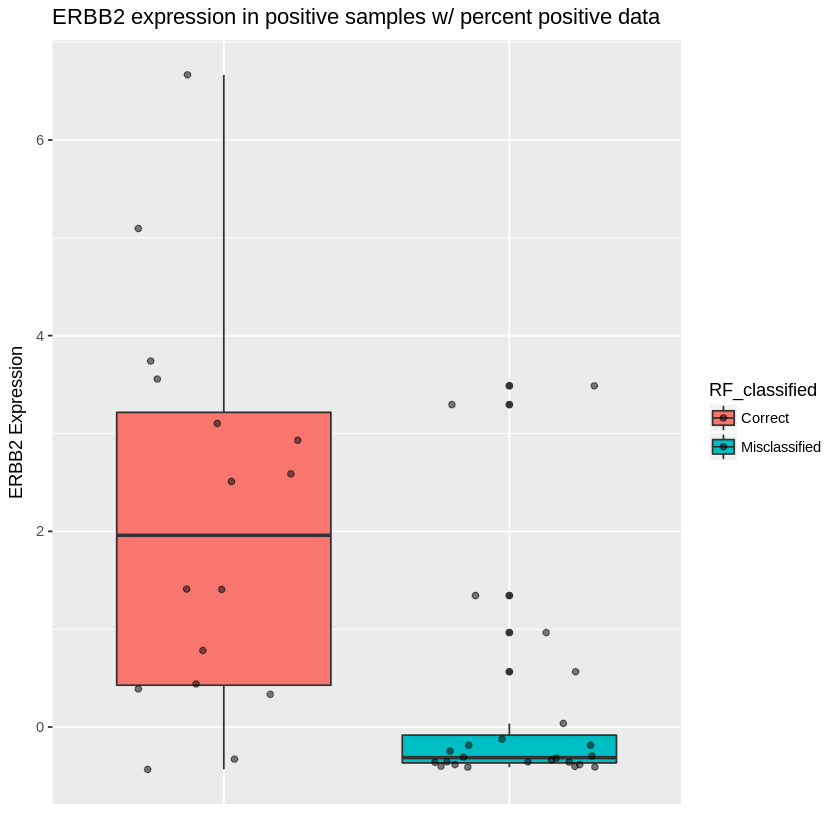

In [146]:
gbox <- ggplot(arrange(merge(positive.percents, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_ihc_percent_positive, RF_classified),
               aes(x = RF_classified, y = ERBB2, fill = RF_classified))

ggbox <- gbox + geom_boxplot() + geom_jitter(width = .3, alpha = .5) + 
                labs(title = "ERBB2 expression in positive samples w/ percent positive data", x = "", y = "ERBB2 Expression") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/perc_pos_RF_all.pdf", ggbox, device = "pdf")

ggbox

Saving 6.67 x 6.67 in image


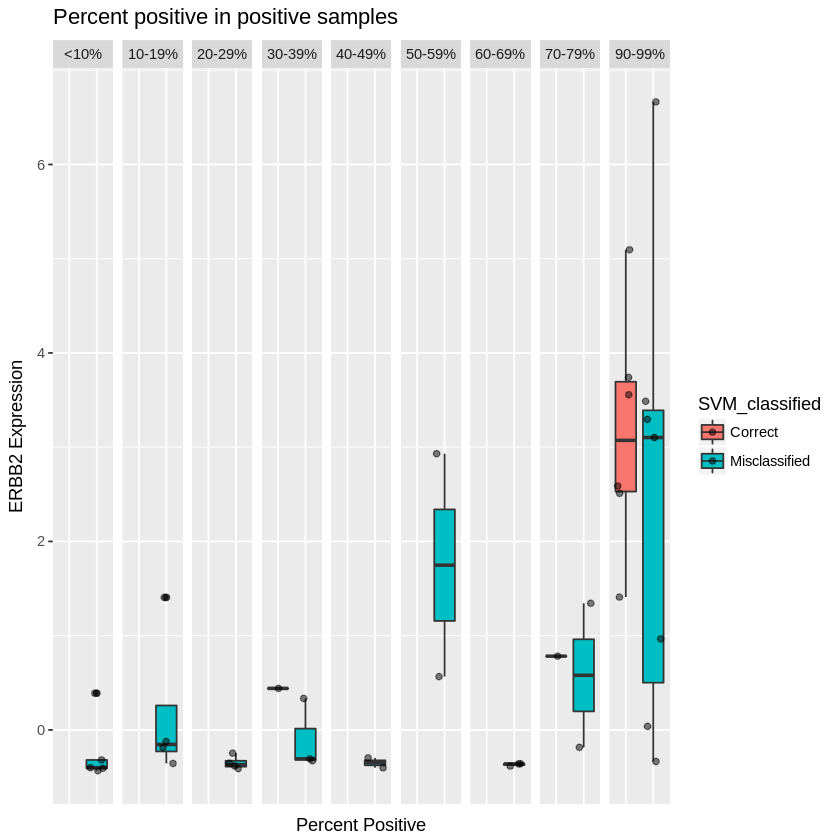

In [147]:
gbox <- ggplot(arrange(merge(positive.percents, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_ihc_percent_positive, SVM_classified),
               aes(x = SVM_classified, y = ERBB2, fill = SVM_classified))

ggbox <- gbox + geom_boxplot() + facet_grid( ~ her2_ihc_percent_positive) + geom_jitter(width = .3, alpha = .5) + 
                labs(title = "Percent positive in positive samples", x = "Percent Positive", y = "ERBB2 Expression") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/perc_pos_SVM_ERBB2.pdf", ggbox, device = "pdf")

ggbox

Saving 6.67 x 6.67 in image


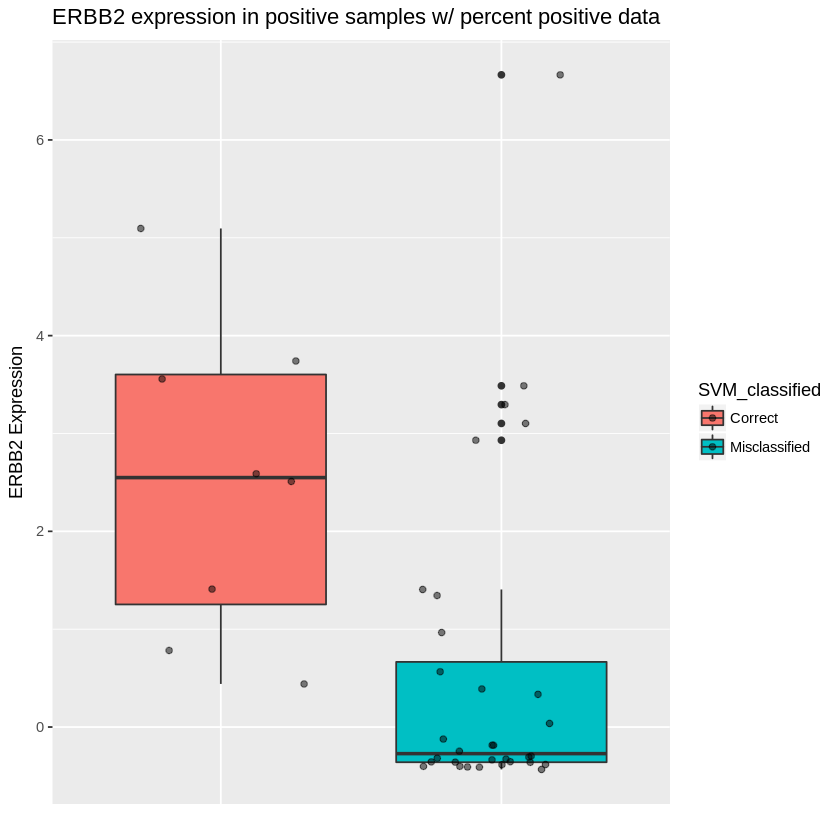

In [148]:
gbox <- ggplot(arrange(merge(positive.percents, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_ihc_percent_positive, SVM_classified),
               aes(x = SVM_classified, y = ERBB2, fill = SVM_classified))

ggbox <- gbox + geom_boxplot() + geom_jitter(width = .3, alpha = .5) + 
                labs(title = "ERBB2 expression in positive samples w/ percent positive data", x = "", y = "ERBB2 Expression") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/perc_pos_SVM_all.pdf", ggbox, device = "pdf")

ggbox

## Time to do the same to the negative samples

Saving 6.67 x 6.67 in image


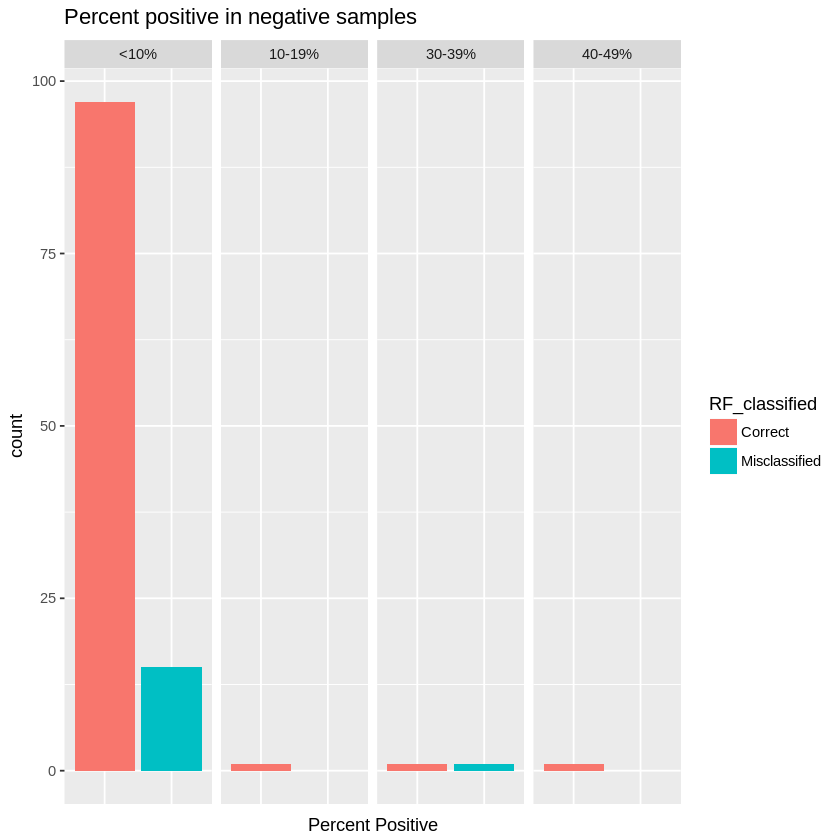

In [149]:
ghist <- ggplot(arrange(merge(negative.percents, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_ihc_percent_positive, RF_classified),
               aes(x = RF_classified, fill = RF_classified))

gghist <- ghist + geom_bar(stat = "count") + facet_grid( ~ her2_ihc_percent_positive) + 
                labs(title = "Percent positive in negative samples", x = "Percent Positive") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/perc_neg_RF.pdf", gghist, device = "pdf")

gghist

Saving 6.67 x 6.67 in image


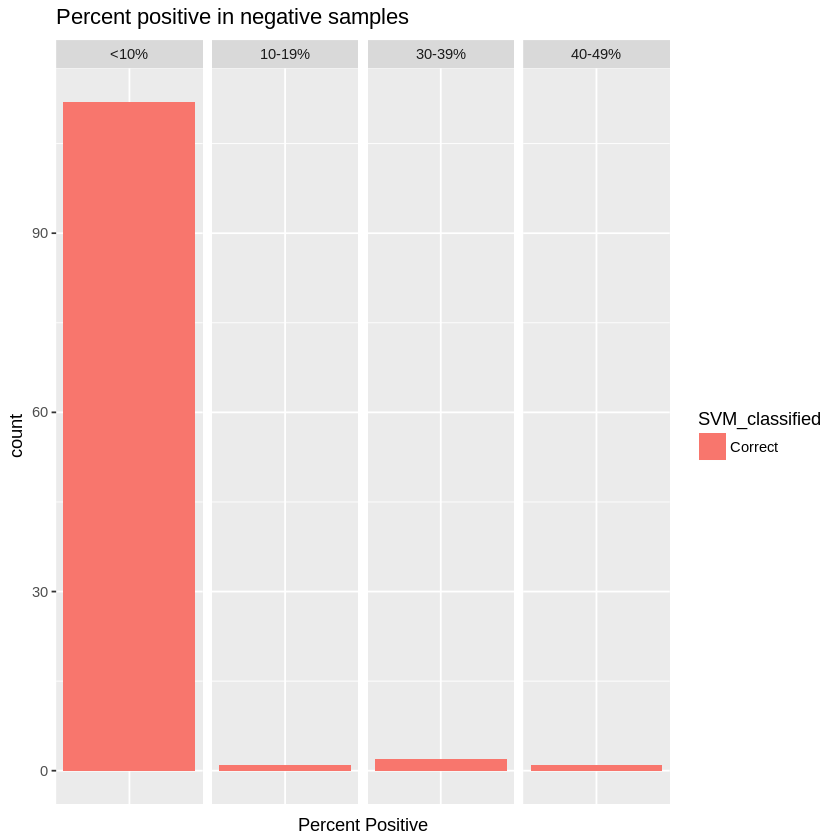

In [150]:
ghist <- ggplot(arrange(merge(negative.percents, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_ihc_percent_positive, SVM_classified),
               aes(x = SVM_classified, fill = SVM_classified))

gghist <- ghist + geom_bar(stat = "count") + facet_grid( ~ her2_ihc_percent_positive) + 
                labs(title = "Percent positive in negative samples", x = "Percent Positive") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/perc_neg_SVM.pdf", gghist, device = "pdf")

gghist

Saving 6.67 x 6.67 in image


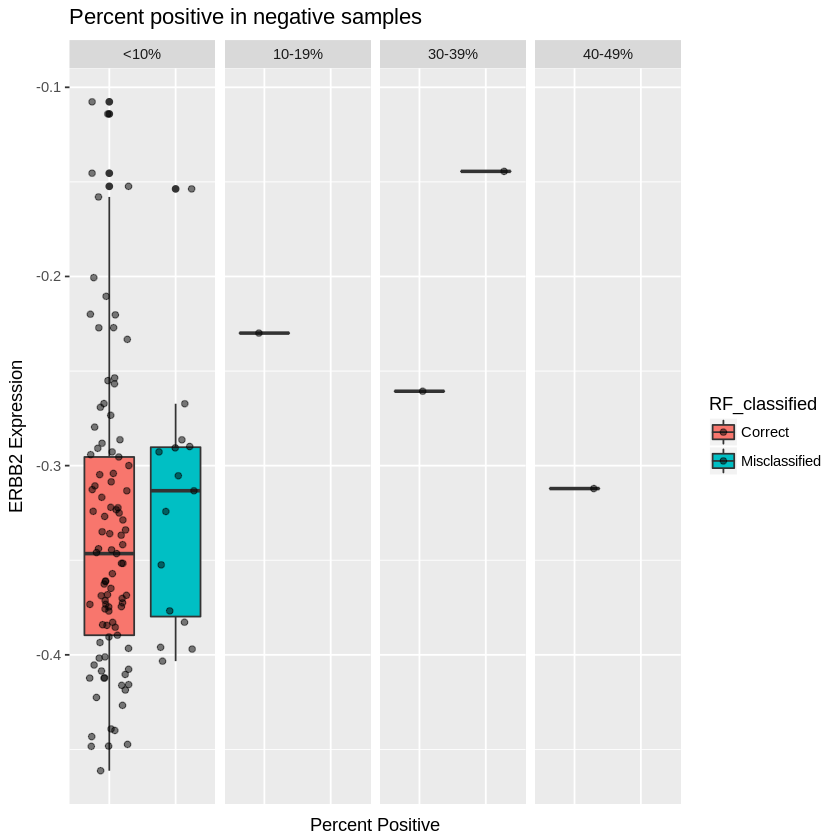

In [151]:
gbox <- ggplot(arrange(merge(negative.percents, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_ihc_percent_positive, RF_classified),
               aes(x = RF_classified, y = ERBB2, fill = RF_classified))

ggbox <- gbox + geom_boxplot() + facet_grid( ~ her2_ihc_percent_positive) + geom_jitter(width = .3, alpha = .5) + 
                labs(title = "Percent positive in negative samples", x = "Percent Positive", y = "ERBB2 Expression") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/perc_neg_RF_ERBB2.pdf", ggbox, device = "pdf")

ggbox

Saving 6.67 x 6.67 in image


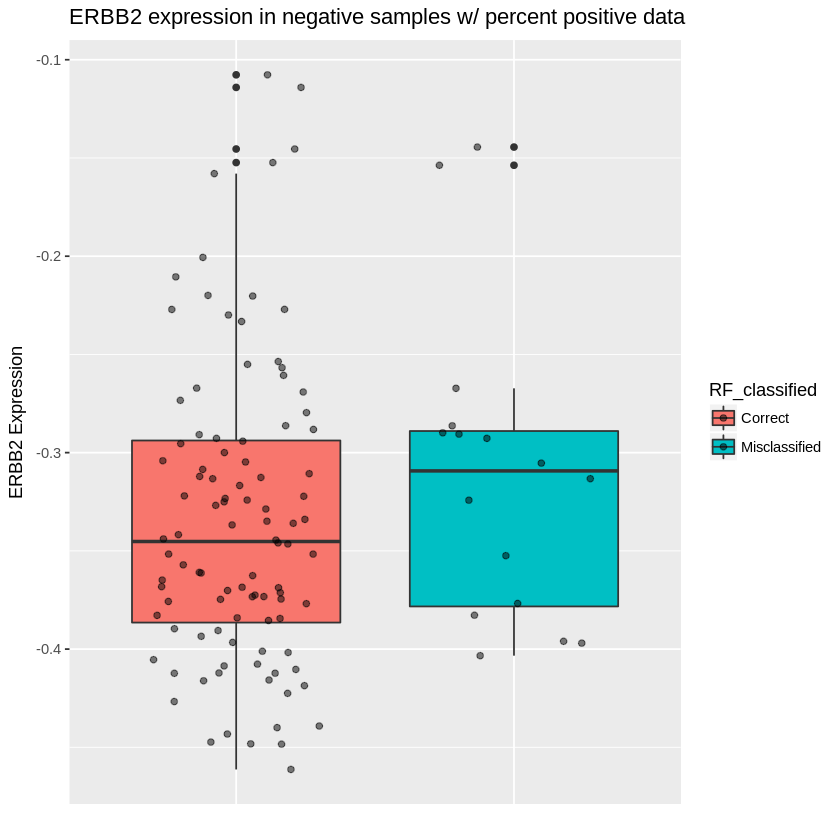

In [152]:
gbox <- ggplot(arrange(merge(negative.percents, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_ihc_percent_positive, RF_classified),
               aes(x = RF_classified, y = ERBB2, fill = RF_classified))

ggbox <- gbox + geom_boxplot() + geom_jitter(width = .3, alpha = .5) + 
                labs(title = "ERBB2 expression in negative samples w/ percent positive data", x = "", y = "ERBB2 Expression") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/perc_neg_RF_all.pdf", ggbox, device = "pdf")

ggbox

Saving 6.67 x 6.67 in image


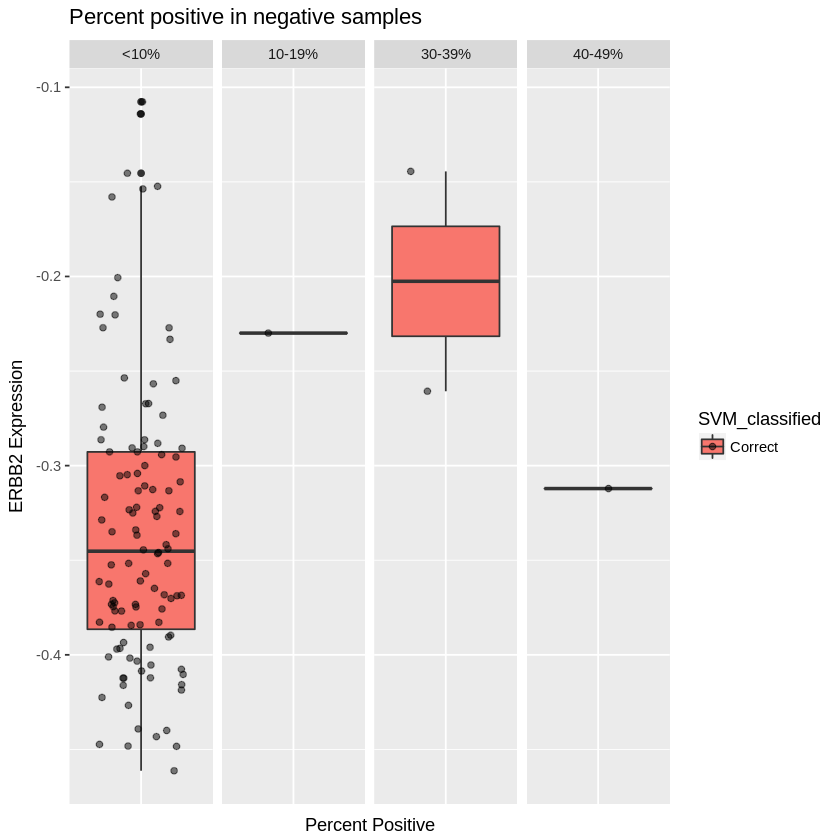

In [153]:
gbox <- ggplot(arrange(merge(negative.percents, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_ihc_percent_positive, SVM_classified),
               aes(x = SVM_classified, y = ERBB2, fill = SVM_classified))

ggbox <- gbox + geom_boxplot() + facet_grid( ~ her2_ihc_percent_positive) + geom_jitter(width = .3, alpha = .5) + 
                labs(title = "Percent positive in negative samples", x = "Percent Positive", y = "ERBB2 Expression") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/perc_neg_SVM_ERBB2.pdf", ggbox, device = "pdf")

ggbox

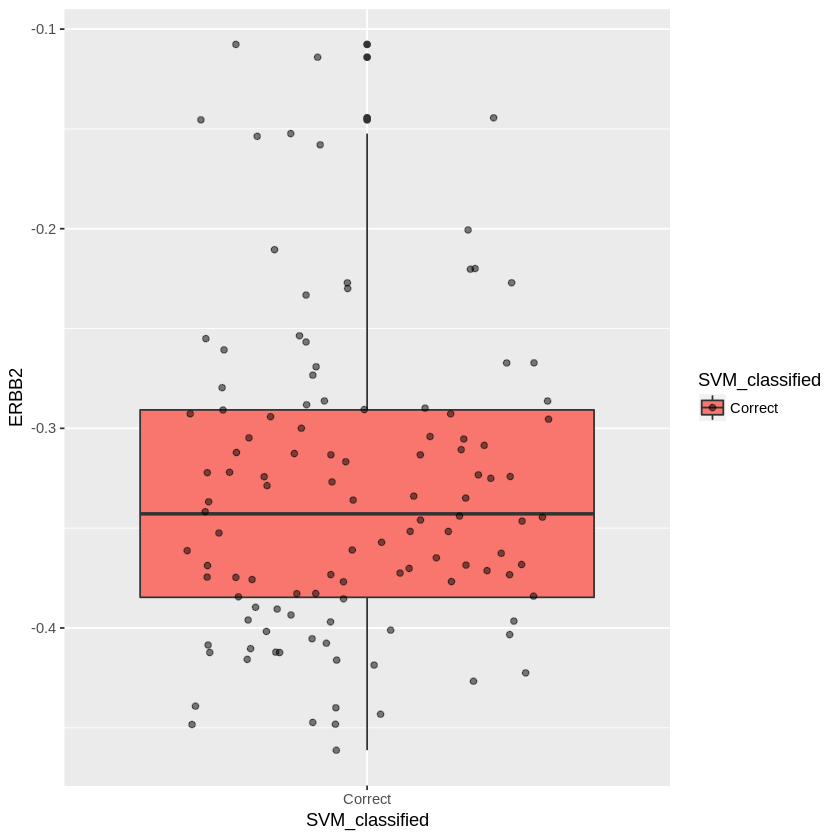

In [154]:
gbox <- ggplot(arrange(merge(negative.percents, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_ihc_percent_positive, SVM_classified),
               aes(x = SVM_classified, y = ERBB2, fill = SVM_classified))

ggbox <- gbox + geom_boxplot() + geom_jitter(width = .3, alpha = .5)

ggbox

## Compare her2_ihc_score

In [155]:
positive.scores <- her2.clinical[which(!is.na(her2.clinical$her2_ihc_score) & her2.clinical$her2_ihc_score != "[Not Available]" & her2.clinical$her2_status_by_ihc == "Positive"), c('her2_status_by_ihc', 'her2_ihc_score')]

In [156]:
negative.scores <- her2.clinical[which(!is.na(her2.clinical$her2_ihc_score) & her2.clinical$her2_ihc_score != "[Not Available]" & her2.clinical$her2_status_by_ihc == "Negative"), c('her2_status_by_ihc', 'her2_ihc_score')]

In [157]:
rownames(svm.misclassied) <- svm.misclassied$Sample

positive.scores$Sample <- rownames(positive.scores)

negative.scores$Sample <- rownames(negative.scores)

In [158]:
arrange(merge(svm.misclassied[ , c('ERBB2', 'Sample', 'SVM_classified')], positive.scores, by = 'Sample'), her2_ihc_score, SVM_classified)

Sample,ERBB2,SVM_classified,her2_status_by_ihc,her2_ihc_score
TCGA-AC-A3YI-01A-21R-A239-07,-0.16569874,Misclassified,Positive,1+
TCGA-AC-A8OS-01A-12R-A41B-07,-0.35589511,Misclassified,Positive,1+
TCGA-AN-A03X-01A-21R-A00Z-07,-0.28262102,Misclassified,Positive,1+
TCGA-AN-A0FJ-01A-11R-A00Z-07,-0.40176866,Misclassified,Positive,1+
TCGA-AN-A0FK-01A-11R-A034-07,-0.35420157,Misclassified,Positive,1+
TCGA-AN-A0FL-01A-11R-A034-07,-0.41020427,Misclassified,Positive,1+
TCGA-AN-A0FN-01A-11R-A034-07,-0.38309229,Misclassified,Positive,1+
TCGA-AN-A0FS-01A-11R-A034-07,-0.24668606,Misclassified,Positive,1+
TCGA-AN-A0FX-01A-11R-A034-07,-0.34950865,Misclassified,Positive,1+
TCGA-E9-A295-01A-11R-A16F-07,-0.31245777,Misclassified,Positive,1+


Saving 6.67 x 6.67 in image


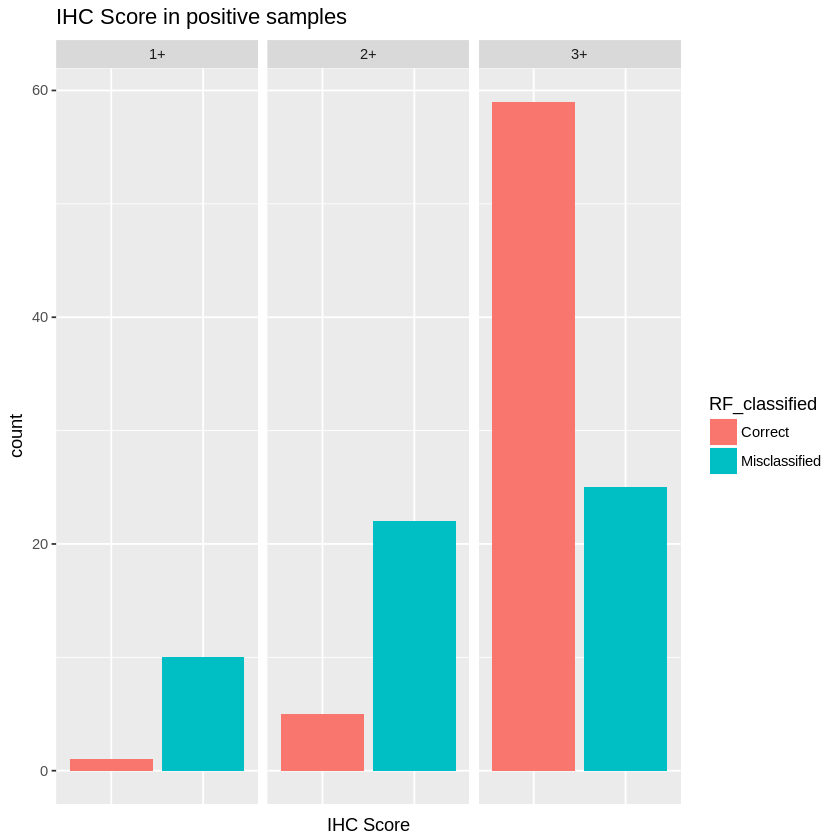

In [159]:
ghist <- ggplot(arrange(merge(positive.scores, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_ihc_score, RF_classified),
               aes(x = RF_classified, fill = RF_classified))

gghist <- ghist + geom_bar(stat = "count") + facet_grid( ~ her2_ihc_score) + 
                labs(title = "IHC Score in positive samples", x = "IHC Score") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/score_pos_RF.pdf", gghist, device = "pdf")

gghist

Saving 6.67 x 6.67 in image


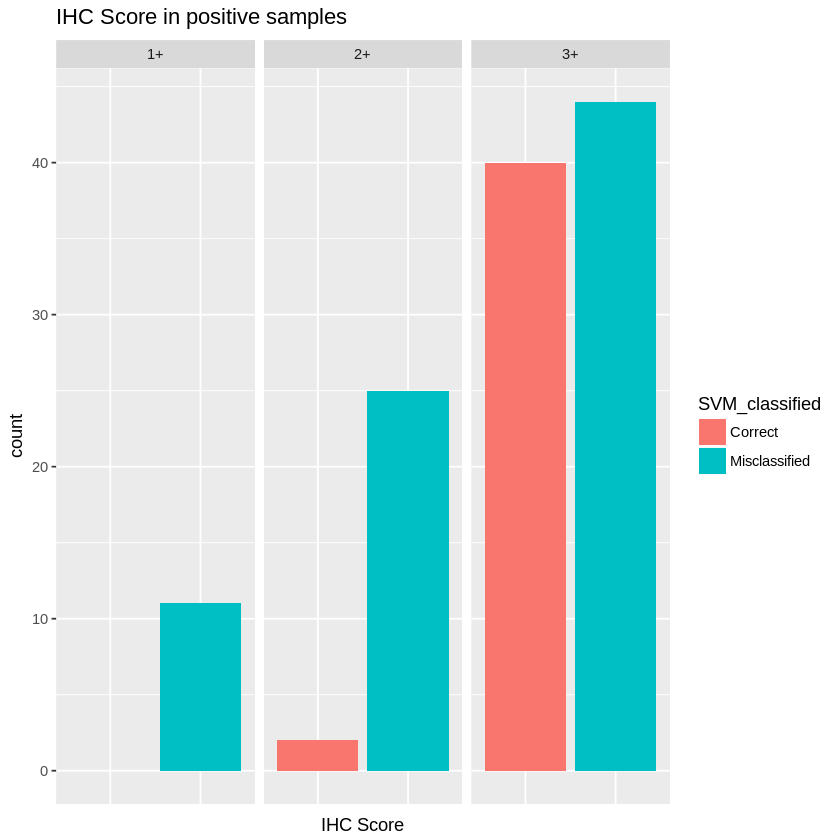

In [160]:
ghist <- ggplot(arrange(merge(positive.scores, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_ihc_score, SVM_classified),
               aes(x = SVM_classified, fill = SVM_classified))

gghist <- ghist + geom_bar(stat = "count") + facet_grid( ~ her2_ihc_score) + 
                labs(title = "IHC Score in positive samples", x = "IHC Score") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/score_pos_SVM.pdf", gghist, device = "pdf")

gghist

Saving 6.67 x 6.67 in image


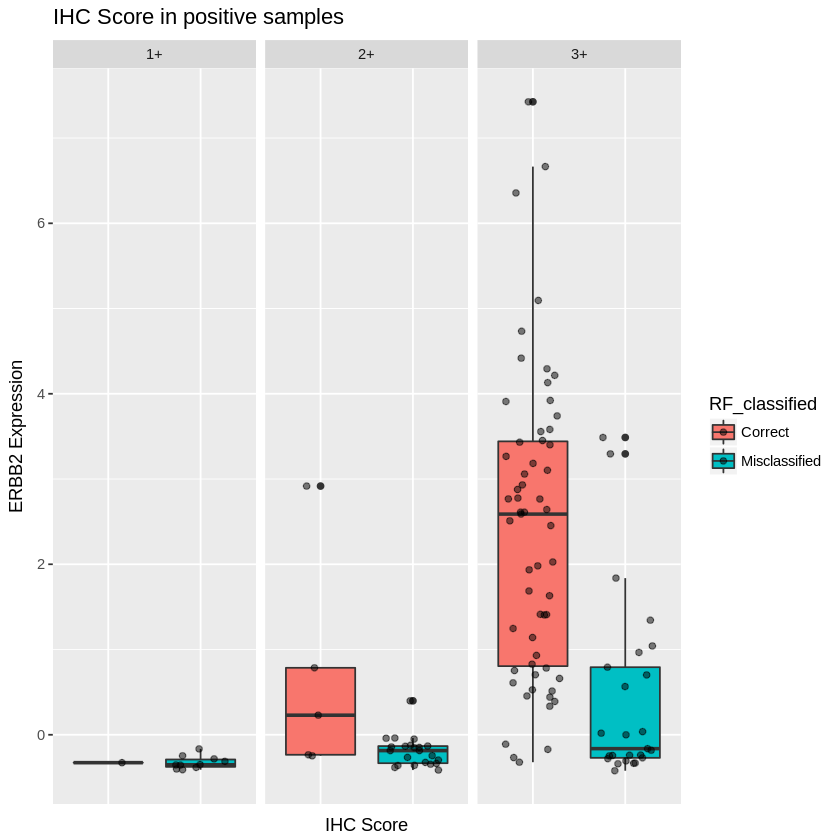

In [161]:
gbox <- ggplot(arrange(merge(positive.scores, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_ihc_score, RF_classified),
               aes(x = RF_classified, y = ERBB2, fill = RF_classified))

ggbox <- gbox + geom_boxplot() + facet_grid( ~ her2_ihc_score) + geom_jitter(width = .3, alpha = .5) + 
                labs(title = "IHC Score in positive samples", x = "IHC Score", y = "ERBB2 Expression") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/score_pos_RF_ERBB2.pdf", ggbox, device = "pdf")

ggbox

Saving 6.67 x 6.67 in image


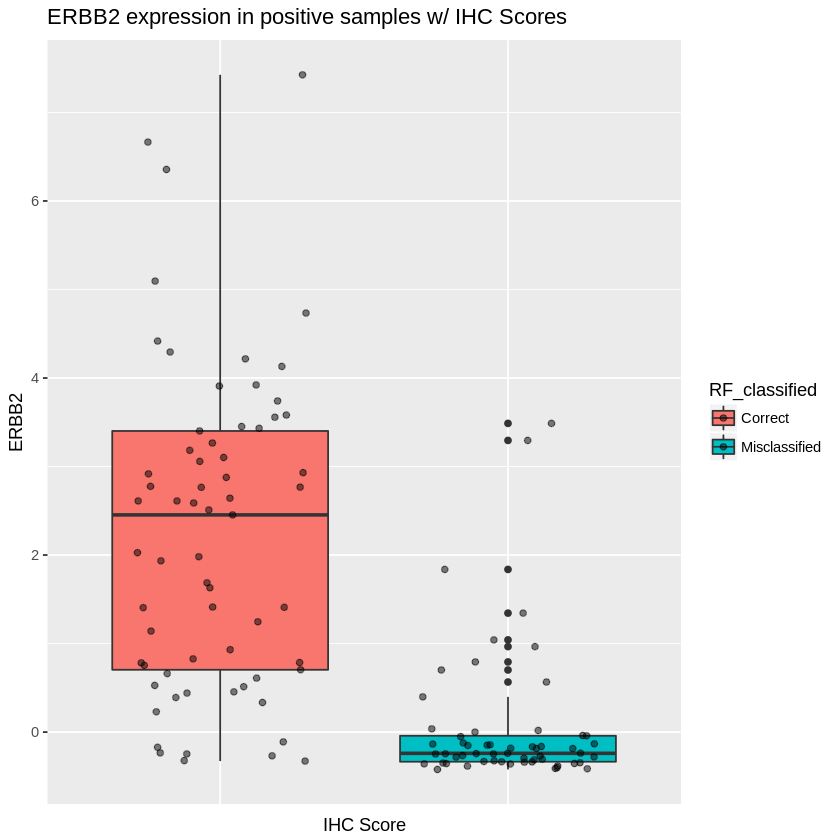

In [162]:
gbox <- ggplot(arrange(merge(positive.scores, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_ihc_score, RF_classified),
               aes(x = RF_classified, y = ERBB2, fill = RF_classified))

ggbox <- gbox + geom_boxplot() + geom_jitter(width = .3, alpha = .5) + 
                labs(title = "ERBB2 expression in positive samples w/ IHC Scores", x = "IHC Score") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/score_pos_RF_all.pdf", ggbox, device = "pdf")

ggbox

Saving 6.67 x 6.67 in image


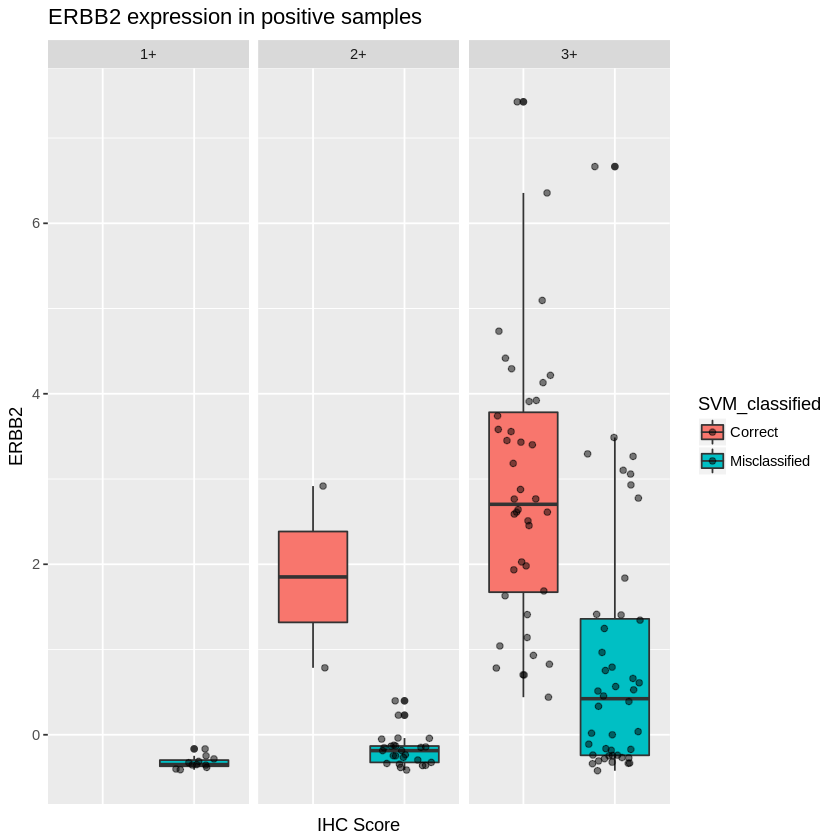

In [163]:
gbox <- ggplot(arrange(merge(positive.scores, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_ihc_score, SVM_classified),
               aes(x = SVM_classified, y = ERBB2, fill = SVM_classified))

ggbox <- gbox + geom_boxplot() + facet_grid( ~ her2_ihc_score) + geom_jitter(width = .3, alpha = .5) + 
                labs(title = "ERBB2 expression in positive samples", x = "IHC Score") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/score_pos_SVM_ERBB2.pdf", ggbox, device = "pdf")

ggbox

Saving 6.67 x 6.67 in image


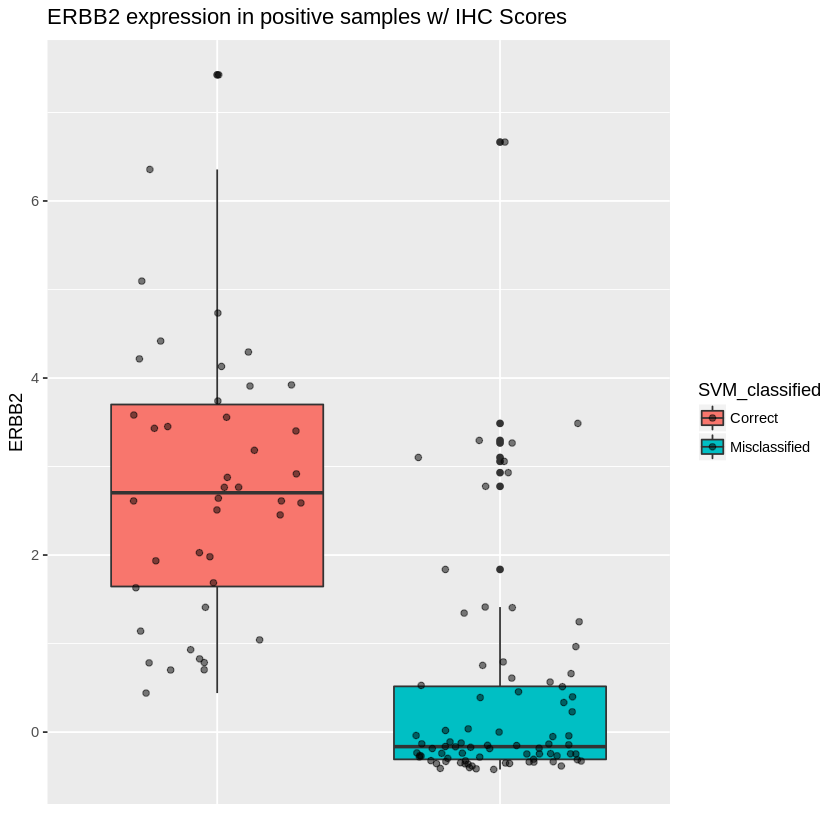

In [164]:
gbox <- ggplot(arrange(merge(positive.scores, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_ihc_score, SVM_classified),
               aes(x = SVM_classified, y = ERBB2, fill = SVM_classified))

ggbox <- gbox + geom_boxplot() + geom_jitter(width = .3, alpha = .5) + 
                labs(title = "ERBB2 expression in positive samples w/ IHC Scores", x = "") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/score_pos_SVM_all.pdf", ggbox, device = "pdf")

ggbox

## Time to do the same to the negative samples

Saving 6.67 x 6.67 in image


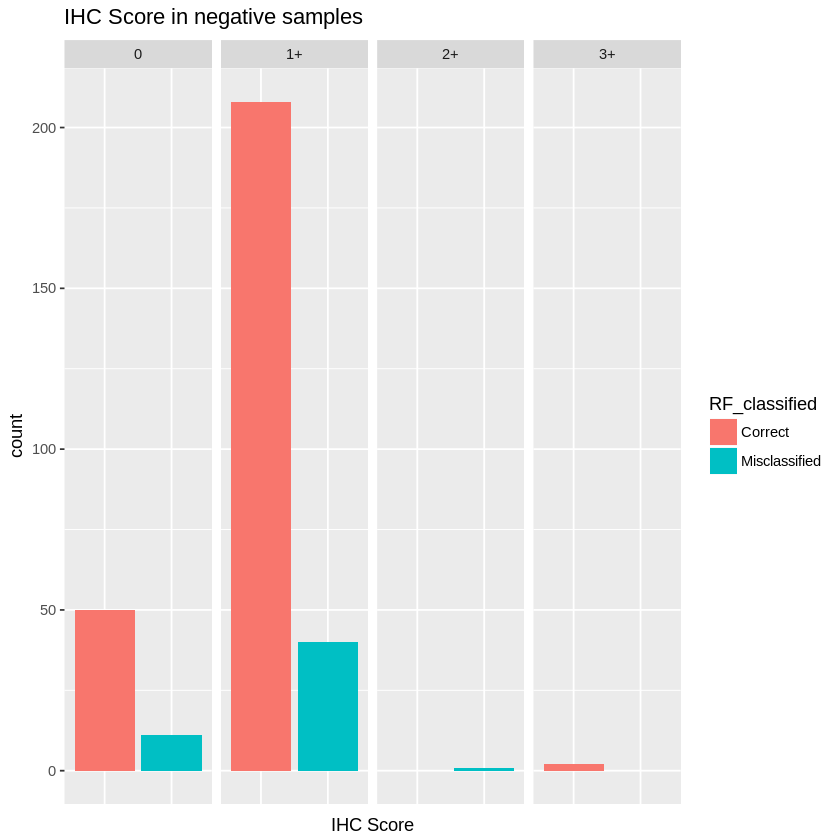

In [165]:
ghist <- ggplot(arrange(merge(negative.scores, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_ihc_score, RF_classified),
               aes(x = RF_classified, fill = RF_classified))

gghist <- ghist + geom_bar(stat = "count") + facet_grid( ~ her2_ihc_score) + 
                labs(title = "IHC Score in negative samples", x = "IHC Score") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/score_neg_RF.pdf", gghist, device = "pdf")

gghist

Saving 6.67 x 6.67 in image


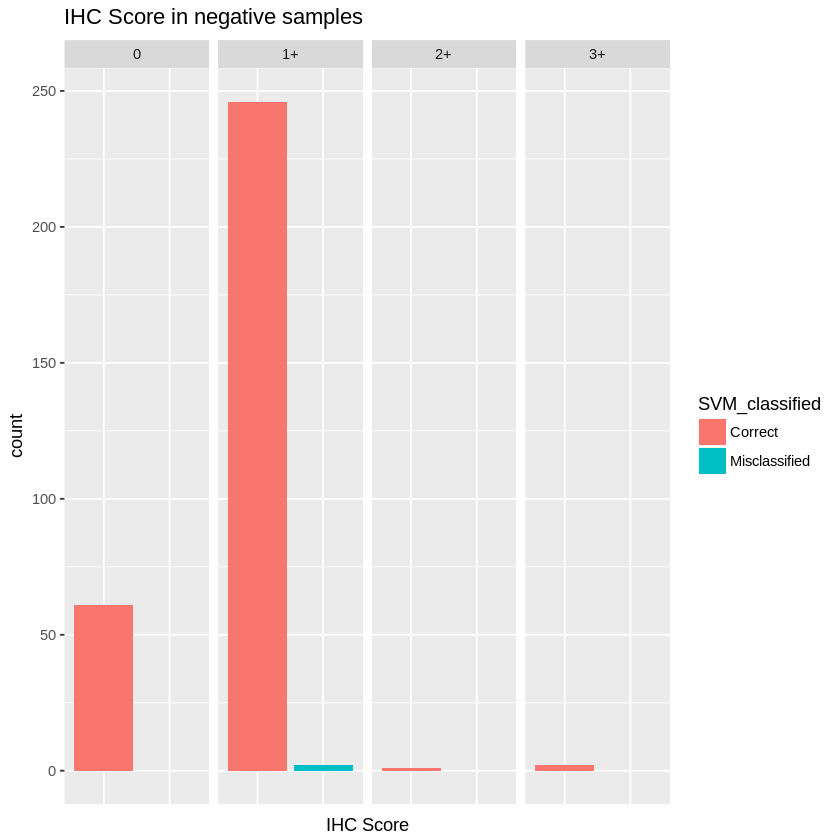

In [166]:
ghist <- ggplot(arrange(merge(negative.scores, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_ihc_score, SVM_classified),
               aes(x = SVM_classified, fill = SVM_classified))

gghist <- ghist + geom_bar(stat = "count") + facet_grid( ~ her2_ihc_score) + 
                labs(title = "IHC Score in negative samples", x = "IHC Score") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/score_neg_SVM.pdf", gghist, device = "pdf")

gghist

Saving 6.67 x 6.67 in image


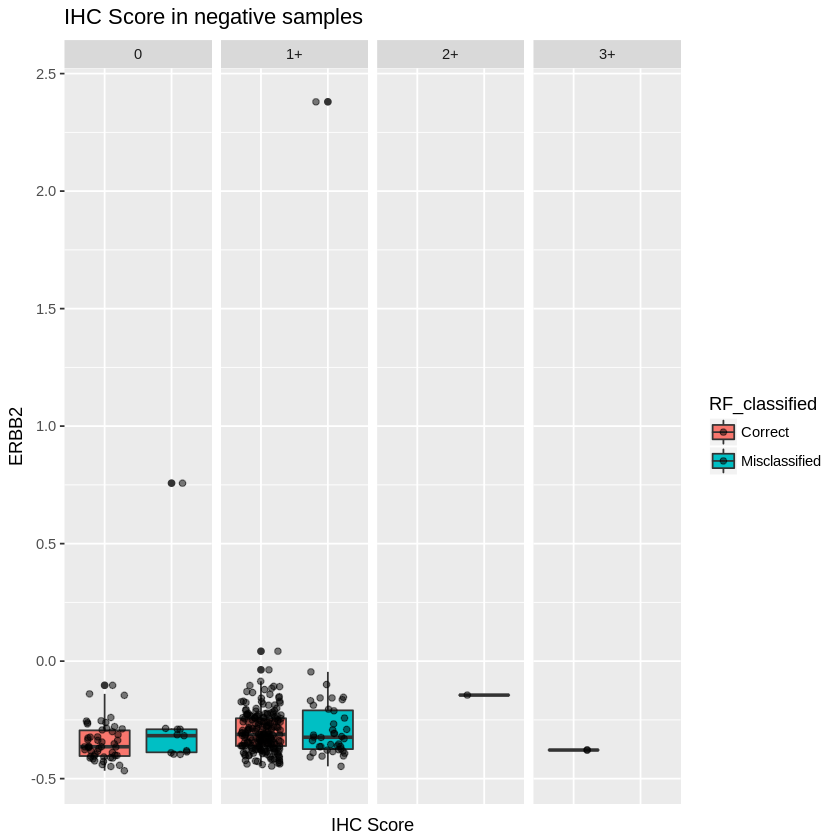

In [167]:
gbox <- ggplot(arrange(merge(negative.scores, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_ihc_score, RF_classified),
               aes(x = RF_classified, y = ERBB2, fill = RF_classified))

ggbox <- gbox + geom_boxplot() + facet_grid( ~ her2_ihc_score) + geom_jitter(width = .3, alpha = .5) + 
                labs(title = "IHC Score in negative samples", x = "IHC Score") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/score_neg_RF_ERBB2.pdf", ggbox, device = "pdf")

ggbox

Saving 6.67 x 6.67 in image


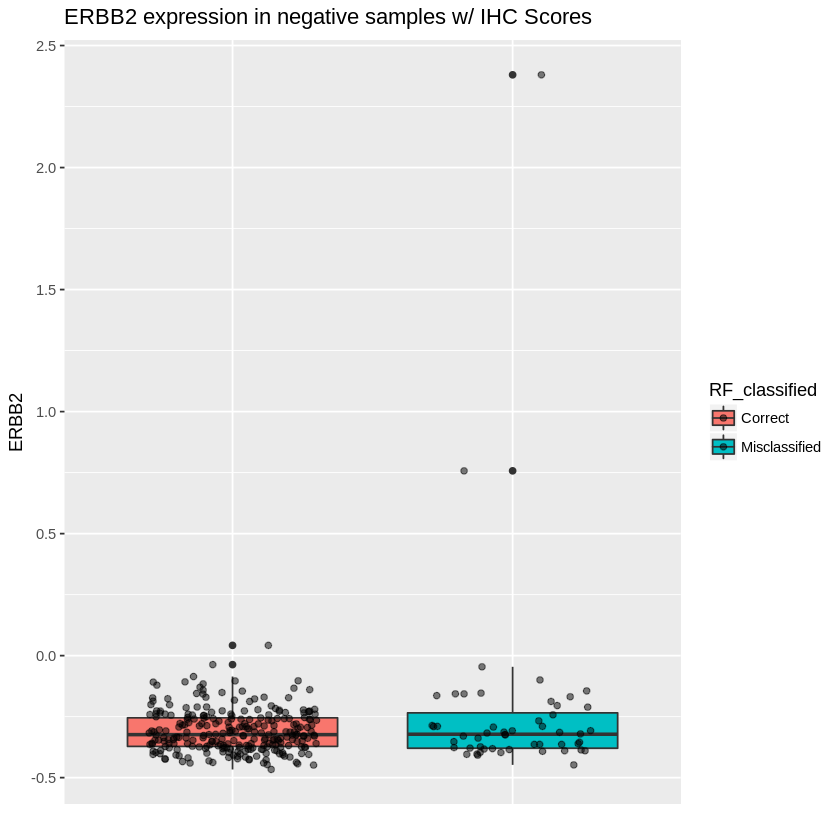

In [168]:
gbox <- ggplot(arrange(merge(negative.scores, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_ihc_score, RF_classified),
               aes(x = RF_classified, y = ERBB2, fill = RF_classified))

ggbox <- gbox + geom_boxplot() + geom_jitter(width = .3, alpha = .5) + 
                labs(title = "ERBB2 expression in negative samples w/ IHC Scores", x = "") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/score_neg_RF_all.pdf", ggbox, device = "pdf")

ggbox

Saving 6.67 x 6.67 in image


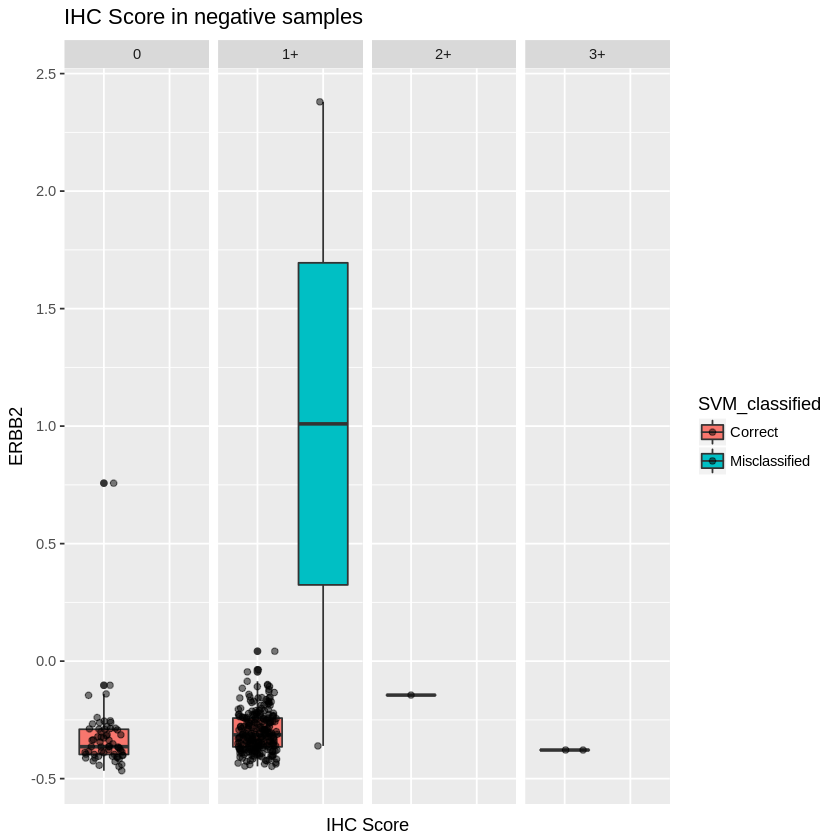

In [169]:
gbox <- ggplot(arrange(merge(negative.scores, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_ihc_score, SVM_classified),
               aes(x = SVM_classified, y = ERBB2, fill = SVM_classified))

ggbox <- gbox + geom_boxplot() + facet_grid( ~ her2_ihc_score) + geom_jitter(width = .3, alpha = .5) + 
                labs(title = "IHC Score in negative samples", x = "IHC Score") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/score_neg_SVM_ERBB2.pdf", ggbox, device = "pdf")

ggbox

Saving 6.67 x 6.67 in image


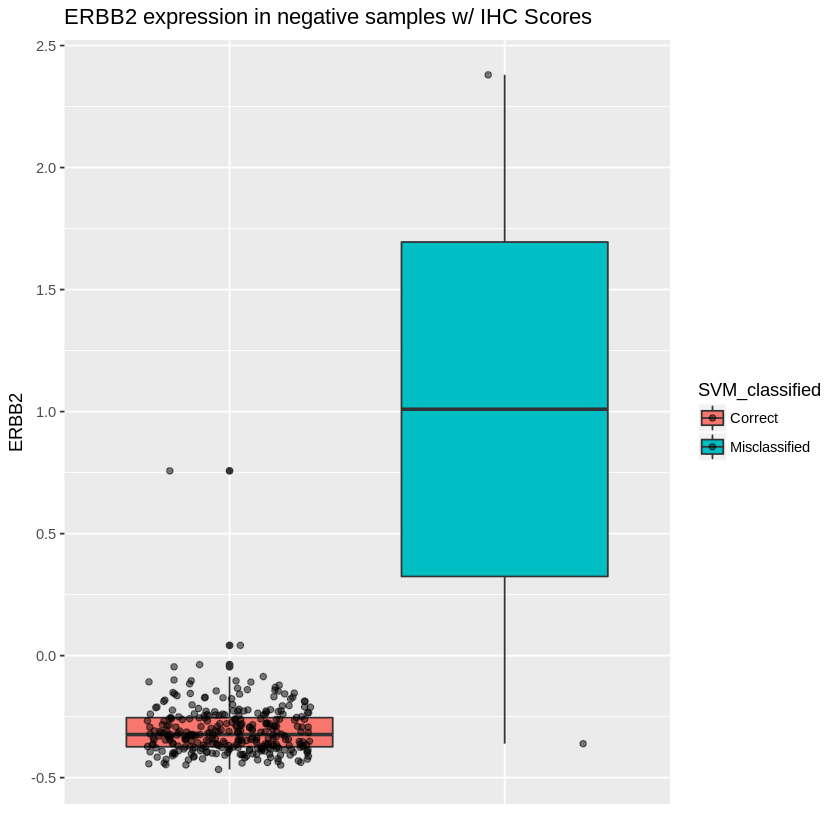

In [170]:
gbox <- ggplot(arrange(merge(negative.scores, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_ihc_score, SVM_classified),
               aes(x = SVM_classified, y = ERBB2, fill = SVM_classified))

ggbox <- gbox + geom_boxplot() + geom_jitter(width = .3, alpha = .5) + 
                labs(title = "ERBB2 expression in negative samples w/ IHC Scores", x = "") + 
                theme(axis.ticks.x = element_blank(), axis.text.x = element_blank())

ggsave("../graphs/misclassied_analyses/score_neg_SVM_all.pdf", ggbox, device = "pdf")

ggbox